![](https://import.cdn.thinkific.com/220744/BExaQBPPQairRWFqxFbK_logo_mastermind_web_png)

¡Ahora es **vuestro turno!**

En este proyecto final os he adjuntado un Dataset con 27.075 juegos en **Steam**, la popular plataforma de juegos de PC. Esta lista está actualizada desde el inicio hasta Abril de 2019.

Ya que tenéis los conocimientos, os pediré que me contestéis a **10 preguntas**:
1. Cual es el TOP10 de juegos más jugados?
2. Cuál es el género de videojuegos más vendido?
3. Qué géneros tienen mejores reviews de media?
4. Cuánto ha ganado el desarrollador que más juegos ha vendido?
5. Cómo afecta a las reviews que un juego sea Early Access?
6. Cuál es el desarrollador (o desarrolladores) que más tipos de juego y cantidad ha desarrollado?
7. En qué mes, desde que tenemos datos, se han publicado más juegos?
8. Cuántas horas se juega de media a cada tipo de juego mensualmente?
9. Los juegos Free to Play tienen mejores o peores reviews?
10. Cómo ha evolucionado el número de achievements (trofeos) por juego?

Os dejamos via libre para contestar a estas preguntas como más os apetezca. Recordad que no hay nada de malo en consultar por internet si tenéis dudas. Las documentaciones oficiales o [Stack Overflow](https://stackoverflow.com/) son sitios geniales para ello!

Al acabar este proyecto, publicadlo en el foro donde está colgado para ver quién es el mejor!

Os dejo la guía de pasos a seguir.

Muchos ánimos!!




# Importando librerías

In [222]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import urllib.request as Req
import plotly.express as px
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Consiguiendo los datos

### Conseguir link

In [ ]:
url = "https://www.mastermind.ac/contents/34598042-crees-que-lo-sabes-todo-sobre-videojuegos/resource/65/download/"

### Descargar el archivo

In [ ]:
Req.urlretrieve(url, "/content/drive/MyDrive/Colab Notebooks/Mastermind_colab/Personal_notebooks/Proyectos/Videogame/Steam_dataset.zip")

HTTPError: HTTP Error 403: Forbidden

> - Nos devuelve un error porque Googledrive no le permite crear un nuevo archivo. Esto funcionaría si estuvieramos trabajando en local, ya que podríamos generar una carpeta nueva sin problema

### Descomprimir el archivo

In [ ]:
from zipfile import ZipFile

steam_zip = ZipFile("/content/drive/MyDrive/Colab Notebooks/Mastermind_colab/Personal_notebooks/Proyectos/Videogame/SteamDataset-220424-201858 (3).zip")

In [ ]:
steam_zip.filelist

[<ZipInfo filename='steam.csv' compress_type=deflate external_attr=0x20 file_size=3425223 compress_size=979195>]

In [ ]:
archivo = steam_zip.open("steam.csv")

### Construir DataFrame

In [ ]:
df = pd.read_csv(archivo, index_col = [0])

In [ ]:
df.tail()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
27098,Google Spotlight Stories: Piggy,2018-06-06,Google Inc.,0,15,0,0,0.0€,10000.0,False,True,False,False,False,False,True,False
27099,Sausage Sports Club,2018-07-19,Chris Wade,18,16,3,0,10.99€,10000.0,True,True,False,False,False,False,False,False
27100,Party Panic,2017-08-07,Everglow Interactive Inc.,28,619,226,84,12.99€,75000.0,True,False,False,False,False,False,False,False
27101,SoulHunt,2016-12-23,WinterCell Studios,18,56,19,0,5.99€,10000.0,True,False,False,False,False,False,False,True
27102,Quickshot,2018-03-12,Headroom.one,0,2,1,0,2.09€,10000.0,True,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27103 entries, 0 to 27102
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                27103 non-null  object 
 1   release_date        27103 non-null  object 
 2   developer           27103 non-null  object 
 3   achievements        27103 non-null  int64  
 4   positive_ratings    27103 non-null  int64  
 5   negative_ratings    27103 non-null  int64  
 6   avg_hours_per_user  27103 non-null  int64  
 7   price               27103 non-null  object 
 8   sells               27103 non-null  float64
 9   action              27103 non-null  bool   
 10  adventure           27103 non-null  bool   
 11  rpg                 27103 non-null  bool   
 12  simulation          27103 non-null  bool   
 13  strategy            27103 non-null  bool   
 14  racing              27103 non-null  bool   
 15  free_to_play        27103 non-null  bool   
 16  earl

In [ ]:
df.columns

Index(['name', 'release_date', 'developer', 'achievements', 'positive_ratings',
       'negative_ratings', 'avg_hours_per_user', 'price', 'sells', 'action',
       'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play',
       'early_access'],
      dtype='object')

# Limpieza y manipulación de datos

## Quitar datos duplicados o irrelevantes

In [ ]:
df.drop_duplicates( keep="first", inplace = True)

In [ ]:
df.duplicated().unique()

array([False])

## Arreglar errores estructurales

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 0 to 27074
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                27075 non-null  object 
 1   release_date        27075 non-null  object 
 2   developer           27075 non-null  object 
 3   achievements        27075 non-null  int64  
 4   positive_ratings    27075 non-null  int64  
 5   negative_ratings    27075 non-null  int64  
 6   avg_hours_per_user  27075 non-null  int64  
 7   price               27075 non-null  object 
 8   sells               27075 non-null  float64
 9   action              27075 non-null  bool   
 10  adventure           27075 non-null  bool   
 11  rpg                 27075 non-null  bool   
 12  simulation          27075 non-null  bool   
 13  strategy            27075 non-null  bool   
 14  racing              27075 non-null  bool   
 15  free_to_play        27075 non-null  bool   
 16  earl

In [ ]:
df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19€,15000000.0,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99€,7500000.0,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99€,7500000.0,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99€,7500000.0,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99€,7500000.0,True,False,False,False,False,False,False,False


In [ ]:
df.tail()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
27070,Room of Pandora,2019-04-24,SHEN JIAWEI,7,3,0,0,2.09€,10000.0,False,True,False,False,False,False,False,False
27071,Cyber Gun,2019-04-23,Semyon Maximov,0,8,1,0,1.69€,10000.0,True,True,False,False,False,False,False,False
27072,Super Star Blast,2019-04-24,EntwicklerX,24,0,1,0,3.99€,10000.0,True,False,False,False,False,False,False,False
27073,New Yankee 7: Deer Hunters,2019-04-17,Yustas Game Studio,0,2,0,0,5.19€,10000.0,False,True,False,False,False,False,False,False
27074,Rune Lord,2019-04-24,Adept Studios GD,0,4,0,0,5.19€,10000.0,False,True,False,False,False,False,False,False


In [ ]:
df.sample(5)

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
4037,Rex Nebular and the Cosmic Gender Bender,2014-10-17,"MicroProse Software, Inc.",0,17,9,0,18.99€,10000.0,False,True,False,False,False,False,False,False
8838,Super Kaiju,2016-12-06,Directive Games Limited,33,26,2,0,14.99€,10000.0,True,False,False,False,False,False,False,False
11999,A Magical High School Girl / 魔法の女子高生,2016-11-22,illuCalab,0,104,33,0,6.99€,10000.0,False,True,True,False,False,False,False,False
7876,Glory Kingdom,2016-02-19,Matthew Robinson,0,2,4,0,3.99€,10000.0,True,True,False,False,True,False,False,True
9701,My Butler,2016-08-14,Dogenzaka Lab,9,34,31,0,6.99€,10000.0,False,True,False,False,False,False,False,False


### Definir errores

> - Se observa que la columna de `release_date` es del tipo "object", por lo que tendremos que transformarla a formato "DateTime"
> - Se observa que la columna `price` es de tipo "object", por lo que tendremos que transfromarla a "float" y eliminar el símbolo del euro.
> - Se observa que la columna `sells` es de tipo "float" cuando no tiene sentido, ya que el formato para las ventas debe ser del tipo "int" ya que se trata de un número entero.

### Modificando PandasSeries de columna "price" a tipo float

In [ ]:
df["price"] = df["price"].str.replace("€", "").apply(float)
df["price"]

0        7.19
1        3.99
2        3.99
3        3.99
4        3.99
         ... 
27070    2.09
27071    1.69
27072    3.99
27073    5.19
27074    5.19
Name: price, Length: 27075, dtype: float64

### Modificando PandasSeries de columna "sells" a tipo int

In [ ]:
df["sells"] = df["sells"].apply(int)
df["sells"]

0        15000000
1         7500000
2         7500000
3         7500000
4         7500000
           ...   
27070       10000
27071       10000
27072       10000
27073       10000
27074       10000
Name: sells, Length: 27075, dtype: int64

### Modificando PandasSeries de columna "release_date" a tipo DateTime

In [ ]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_date"]

0       2000-11-01
1       1999-04-01
2       2003-05-01
3       2001-06-01
4       1999-11-01
           ...    
27070   2019-04-24
27071   2019-04-23
27072   2019-04-24
27073   2019-04-17
27074   2019-04-24
Name: release_date, Length: 27075, dtype: datetime64[ns]

In [ ]:
df.sample(10)

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
12332,Chimeras: Tune of Revenge Collector's Edition,2016-12-14,Elephant Games,0,1,0,0,6.99,10000,False,True,False,False,False,False,False,False
26202,Solitaire: Learn Chemistry,2019-02-17,RTWS,52,2,1,0,0.79,10000,False,False,False,False,False,False,False,False
8387,Legend of Moros,2016-03-03,Cannibal Interactive,0,6,0,0,3.99,10000,False,False,True,False,True,False,False,False
1008,VVVVVV,2010-09-07,Terry Cavanagh,19,6719,268,76,3.99,1500000,True,False,False,False,False,False,False,False
13255,The Red Strings Club,2018-01-22,Deconstructeam,19,2688,221,101,11.39,350000,False,True,False,False,False,False,False,False
5205,The Reject Demon: Toko Chapter 0 — Prelude,2015-05-08,Lupiesoft,0,146,18,670,3.99,35000,False,False,False,False,False,False,False,False
13534,Hanse - The Hanseatic League,2018-04-30,Linked Dimensions,29,28,62,0,11.99,10000,False,False,False,True,True,False,False,False
22155,荒野寻踪,2018-06-01,Wu Zhang,0,2,2,0,2.09,10000,False,True,False,False,True,False,False,False
976,Delve Deeper,2010-09-24,Lunar Giant,50,225,159,241,3.99,75000,False,True,True,False,True,False,False,False
5409,The Elder Scrolls®: Legends™,2017-05-31,"Sparkypants Studios, LLC",0,5365,2099,448,0.00,1500000,False,False,False,False,False,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 0 to 27074
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                27075 non-null  object        
 1   release_date        27075 non-null  datetime64[ns]
 2   developer           27075 non-null  object        
 3   achievements        27075 non-null  int64         
 4   positive_ratings    27075 non-null  int64         
 5   negative_ratings    27075 non-null  int64         
 6   avg_hours_per_user  27075 non-null  int64         
 7   price               27075 non-null  float64       
 8   sells               27075 non-null  int64         
 9   action              27075 non-null  bool          
 10  adventure           27075 non-null  bool          
 11  rpg                 27075 non-null  bool          
 12  simulation          27075 non-null  bool          
 13  strategy            27075 non-null  bool      

In [ ]:
df[["name", "developer"]][:10] #Comprobamos que no hay errores en los nombres de juegos y desarrolladores

,name,developer
0,Counter-Strike,Valve
1,Team Fortress Classic,Valve
2,Day of Defeat,Valve
3,Deathmatch Classic,Valve
4,Half-Life: Opposing Force,Gearbox Software
5,Ricochet,Valve
6,Half-Life,Valve
7,Counter-Strike: Condition Zero,Valve
8,Half-Life: Blue Shift,Gearbox Software
9,Half-Life 2,Valve


## Filtrar outliers

In [ ]:
df.describe()

,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells
count,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04
mean,45.248864,1.000559e+03,211.027147,149.804949,6.078193,1.340905e+05
std,352.670281,1.898872e+04,4284.938531,1827.038141,7.874922,1.328089e+06
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+04
25%,0.000000,6.000000e+00,2.000000,0.000000,1.690000,1.000000e+04
50%,7.000000,2.400000e+01,9.000000,0.000000,3.990000,1.000000e+04
75%,23.000000,1.260000e+02,42.000000,0.000000,7.190000,3.500000e+04
max,9821.000000,2.644404e+06,487076.000000,190625.000000,421.990000,1.500000e+08


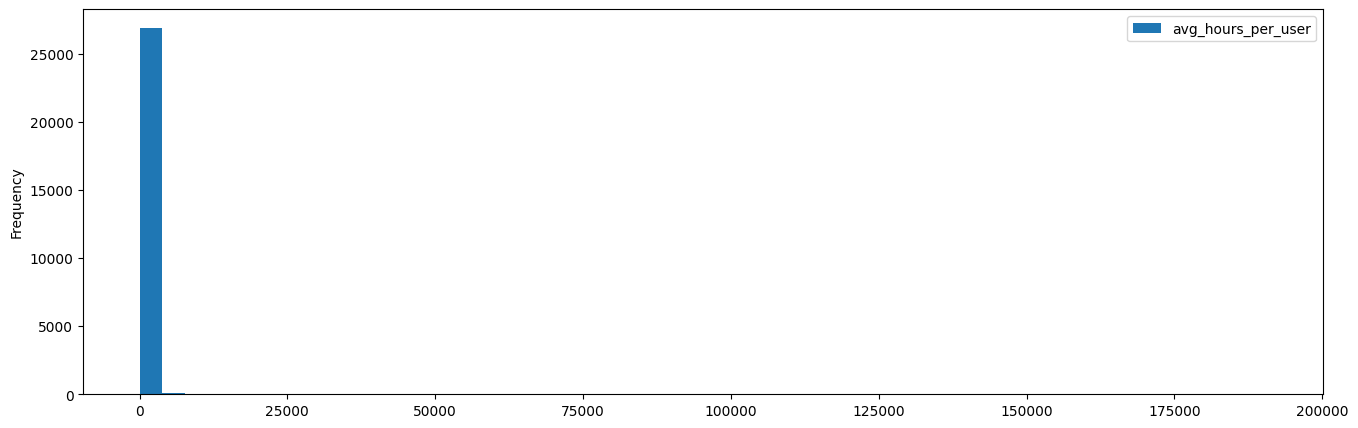

In [ ]:
df.plot(y='avg_hours_per_user',
        kind='hist',
        figsize=(16, 5),
        bins=50)

plt.show()

> - Se puede observar que la gran mayoría de juegos tienen una media de horas jugadas igual a cero. En principio, esos juegos no nos van a interesar, por lo que vamos a eliminarlos de nuestro df para limpiar un poco los datos y quedarnos con aquellos que son más relevantes.

In [ ]:
mask = df["avg_hours_per_user"] > 0
df = df[mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6170 entries, 0 to 26973
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                6170 non-null   object        
 1   release_date        6170 non-null   datetime64[ns]
 2   developer           6170 non-null   object        
 3   achievements        6170 non-null   int64         
 4   positive_ratings    6170 non-null   int64         
 5   negative_ratings    6170 non-null   int64         
 6   avg_hours_per_user  6170 non-null   int64         
 7   price               6170 non-null   float64       
 8   sells               6170 non-null   int64         
 9   action              6170 non-null   bool          
 10  adventure           6170 non-null   bool          
 11  rpg                 6170 non-null   bool          
 12  simulation          6170 non-null   bool          
 13  strategy            6170 non-null   bool       

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.drop(["index"], axis=1, inplace = True)

<ipython-input-29-3d9e95bc2a6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["index"], axis=1, inplace = True)


In [ ]:
df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19,15000000,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99,7500000,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99,7500000,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99,7500000,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99,7500000,True,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170 entries, 0 to 6169
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                6170 non-null   object        
 1   release_date        6170 non-null   datetime64[ns]
 2   developer           6170 non-null   object        
 3   achievements        6170 non-null   int64         
 4   positive_ratings    6170 non-null   int64         
 5   negative_ratings    6170 non-null   int64         
 6   avg_hours_per_user  6170 non-null   int64         
 7   price               6170 non-null   float64       
 8   sells               6170 non-null   int64         
 9   action              6170 non-null   bool          
 10  adventure           6170 non-null   bool          
 11  rpg                 6170 non-null   bool          
 12  simulation          6170 non-null   bool          
 13  strategy            6170 non-null   bool        

## Lidiar con NANs

In [ ]:
df.isna().any()

name                  False
release_date          False
developer             False
achievements          False
positive_ratings      False
negative_ratings      False
avg_hours_per_user    False
price                 False
sells                 False
action                False
adventure             False
rpg                   False
simulation            False
strategy              False
racing                False
free_to_play          False
early_access          False
dtype: bool

## Validar nuestros datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170 entries, 0 to 6169
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                6170 non-null   object        
 1   release_date        6170 non-null   datetime64[ns]
 2   developer           6170 non-null   object        
 3   achievements        6170 non-null   int64         
 4   positive_ratings    6170 non-null   int64         
 5   negative_ratings    6170 non-null   int64         
 6   avg_hours_per_user  6170 non-null   int64         
 7   price               6170 non-null   float64       
 8   sells               6170 non-null   int64         
 9   action              6170 non-null   bool          
 10  adventure           6170 non-null   bool          
 11  rpg                 6170 non-null   bool          
 12  simulation          6170 non-null   bool          
 13  strategy            6170 non-null   bool        

# EDA

## Cual es el TOP10 de juegos más jugados?

In [ ]:
mas_jugados = df.sort_values(by = "avg_hours_per_user", ascending=False)[["name", "avg_hours_per_user"]][:10]
mas_jugados.reset_index(inplace = True)
mas_jugados.drop("index", inplace = True, axis = 1)

In [ ]:
mas_jugados

,name,avg_hours_per_user
0,The Abbey of Crime Extensum,190625
1,The Banner Saga: Factions,95245
2,The Secret of Tremendous Corporation,95242
3,PRICE,63481
4,Boundless,55204
5,Shroud of the Avatar: Forsaken Virtues,54618
6,X-Plane 11,44169
7,懒人修仙传,43632
8,Fantasy Grounds,43074
9,Screeps,38805


### Usando matplotlib

In [ ]:
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25042 (\N{CJK UNIFIED IDEOGRAPH-61D2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20462 (\N{CJK UNIFIED IDEOGRAPH-4FEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20185 (\N{CJK UNIFIED IDEOGRAPH-4ED9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


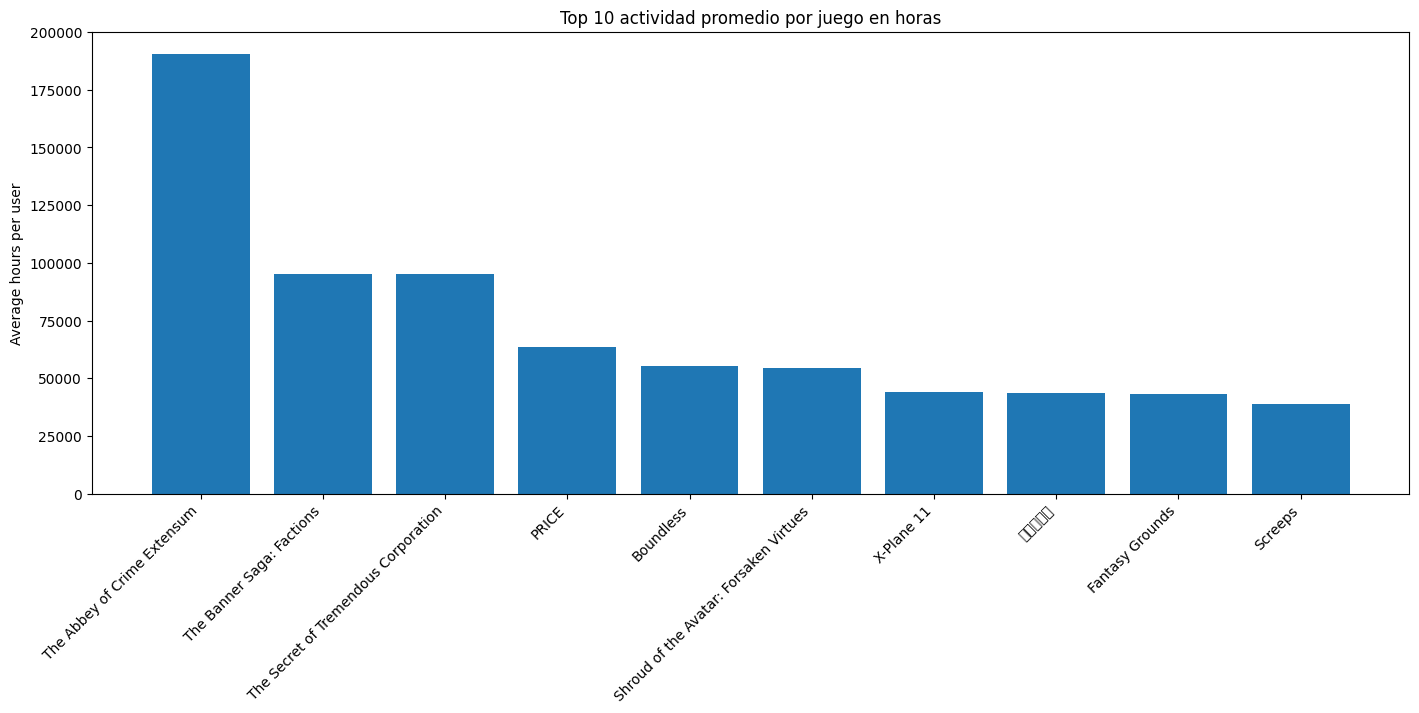

In [ ]:
x = mas_jugados["name"]
y = mas_jugados["avg_hours_per_user"]

plt.figure(figsize=(17, 6))

plt.bar(x, y)

plt.xlabel(None)
plt.ylabel("Average hours per user")
plt.title("Top 10 actividad promedio por juego en horas")
plt.xticks(rotation=45,
           ha="right",
           fontsize=10)

plt.show()

> - Voy a definir una función para construir los bar plots

In [107]:
def bar_plot(x, y, title, xlabel_title, ylabel_title):

  plt.figure(figsize=(17, 6))

  plt.bar(x, y)

  plt.xlabel(xlabel_title)
  plt.ylabel(ylabel_title)
  plt.title(title)
  plt.xticks(rotation=45,
            ha="right",
            fontsize=10)

  return plt.show()

In [ ]:
# Using altair from the code snippets

import altair as alt
alt.Chart(mas_jugados).mark_bar().encode(
  x='avg_hours_per_user',
  y=alt.Y('name', sort="-x")
).properties(
    title={
        "text": "Top 10 horas de actividad promedio por juego",
        "fontSize": 15,
        "fontWeight": "bold",
        "anchor": "middle"
        }
)

alt.Chart(...)

### Usando seaborn

<ipython-input-39-40b5af12bb82>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(x,
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25042 (\N{CJK UNIFIED IDEOGRAPH-61D2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20462 (\N{CJK UNIFIED IDEOGRAPH-4FEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20185 (\N{CJK UNIFIED IDEOGRAPH-4ED9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151:

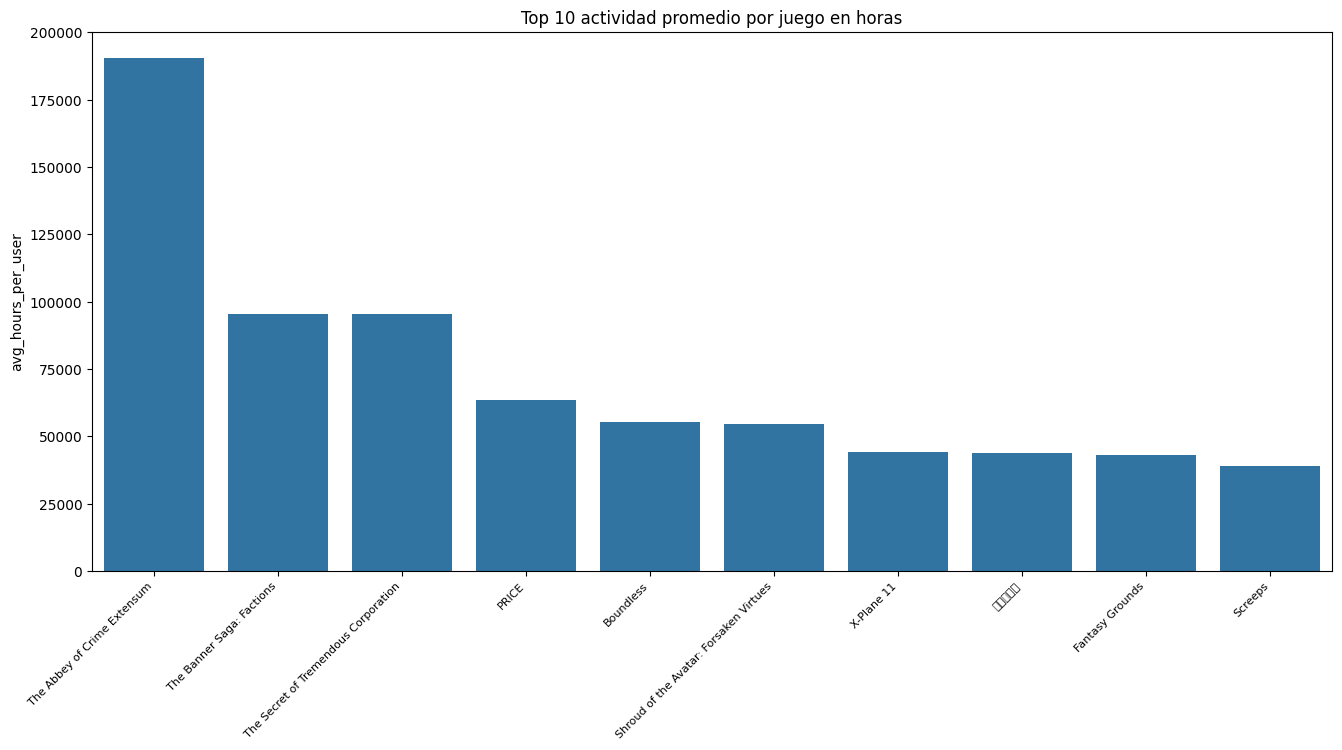

In [ ]:
fig = plt.figure(figsize=(16, 7))

g = sns.barplot(x=x, y=y)
g.set_title("Top 10 actividad promedio por juego en horas")
g.set(xlabel=None)
g.set_xticklabels(x,
                  rotation = 45,
                  horizontalalignment='right',
                  fontsize = 8)

plt.show()

## Cuál es el género de videojuegos más vendido?

> - Comprobamos que un mismo juego puede ser de varios tipos de genero

In [ ]:
df.sample(5)

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
2423,Castle,2015-01-07,Snails Animation,32,163,83,174,3.99,75000,True,False,False,False,False,False,False,False
337,Trainz™ Simulator 12,2011-06-08,N3V Games,50,498,364,31,7.19,150000,False,False,False,True,False,False,False,False
585,ARMA: Gold Edition,2011-07-13,Bohemia Interactive,0,548,209,22,5.99,750000,True,False,False,True,True,False,False,False
1757,Speed Kills,2014-05-16,Holy Warp;Black Wing Foundation,50,188,186,286,6.99,350000,True,False,False,False,False,True,False,False
1231,Skullgirls,2013-08-22,Lab Zero Games,16,14298,838,347,6.99,1500000,True,False,False,False,False,False,False,False


In [71]:
grouped_genres = df.groupby(['action', 'adventure', 'rpg', 'simulation', 'strategy',
                             'racing', 'free_to_play',  'early_access'])['sells'].sum().reset_index(name='total_sells')
grouped_genres.head()

,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access,total_sells
0,False,False,False,False,False,False,False,False,83095000
1,False,False,False,False,False,False,False,True,3040000
2,False,False,False,False,False,False,True,False,34200000
3,False,False,False,False,False,False,True,True,1020000
4,False,False,False,False,False,True,False,False,24360000


In [89]:
genres = grouped_genres.sort_values(by='total_sells', ascending=False)[
    ['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play', 'early_access', 'total_sells']][:5] #Nos quedamos con el top 5 de generos más vendidos

In [90]:
genres_name = genres.drop(['total_sells'], axis=1)

In [91]:
genres_name['genre'] = genres_name.apply(
    lambda x: ', '.join(x.index[x]), axis=1)

In [92]:
genres['genre'] = genres_name['genre']

In [93]:
top_genres = genres[['genre', 'total_sells']]
top_genres.set_index("genre")

,total_sells
genre,
action,647375000
"action, adventure",375220000
"action, free_to_play",348945000
"action, strategy, free_to_play",167900000
strategy,159565000


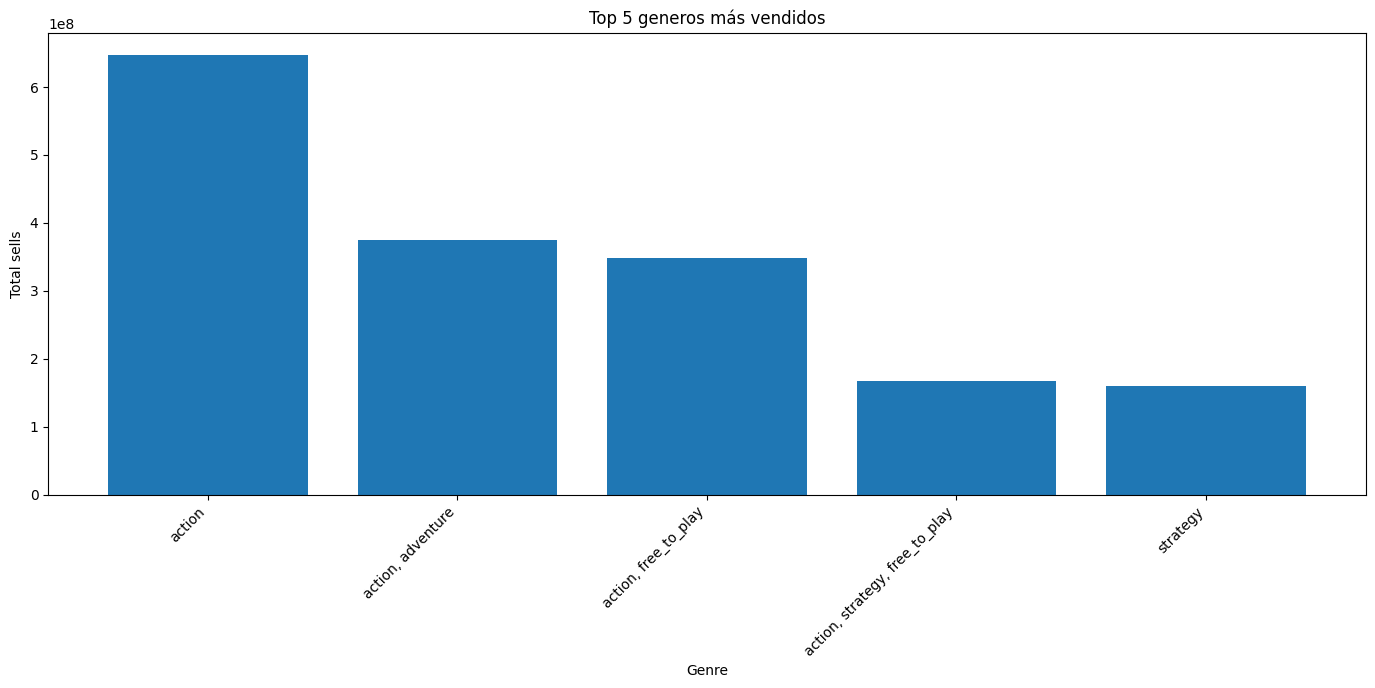

In [95]:
x = top_genres["genre"]
y = top_genres["total_sells"]

plt.figure(figsize=(17, 6))

plt.bar(x, y)

plt.xlabel("Genre")
plt.ylabel("Total sells")
plt.title("Top 5 generos más vendidos")
plt.xticks(rotation=45,
           ha="right",
           fontsize=10)

plt.show()

### Otra forma de resolverlo

In [116]:
genres = df[['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play', 'early_access', "sells"]]
genres.head()

,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access,sells
0,True,False,False,False,False,False,False,False,15000000
1,True,False,False,False,False,False,False,False,7500000
2,True,False,False,False,False,False,False,False,7500000
3,True,False,False,False,False,False,False,False,7500000
4,True,False,False,False,False,False,False,False,7500000


In [117]:
# Se crea un diccionario localizando cuando un genero cumple la condición de True en función del genero y se suman las ventas
total_sells = {"total_sells": [genres.loc[genres["action"] == True].sum()["sells"],
                              genres.loc[genres["adventure"] == True].sum()["sells"],
                              genres.loc[genres["rpg"] == True].sum()["sells"],
                              genres.loc[genres["simulation"] == True].sum()["sells"],
                              genres.loc[genres["strategy"] == True].sum()["sells"],
                              genres.loc[genres["racing"] == True].sum()["sells"],
                              genres.loc[genres["free_to_play"] == True].sum()["sells"],
                              genres.loc[genres["early_access"] == True].sum()["sells"]],
               "Genres":['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play', 'early_access']
               }

# Convertimos el diccionario creado anteriormente en un DataFrame para poder t5rabajar con él.
df_total_sells = pd.DataFrame(total_sells)
df_total_sells.set_index("Genres")

,total_sells
Genres,
action,2210715000
adventure,969890000
rpg,633965000
simulation,454710000
strategy,685955000
racing,71290000
free_to_play,967405000
early_access,118005000


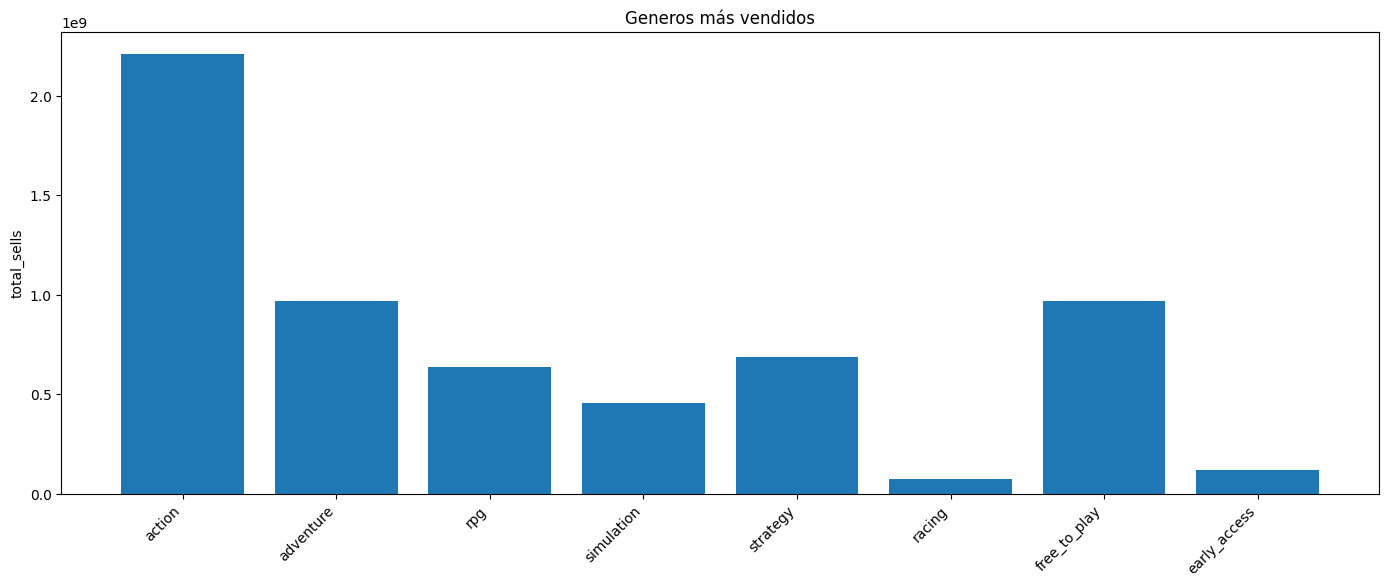

In [118]:
bar_plot(df_total_sells["Genres"], df_total_sells["total_sells"],
         "Generos más vendidos", None, "total_sells")

## Qué géneros tienen mejores reviews de media?

In [119]:
df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19,15000000,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99,7500000,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99,7500000,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99,7500000,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99,7500000,True,False,False,False,False,False,False,False


In [120]:
genres = df[['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play', 'early_access', "positive_ratings"]]
genres.head()

,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access,positive_ratings
0,True,False,False,False,False,False,False,False,124534
1,True,False,False,False,False,False,False,False,3318
2,True,False,False,False,False,False,False,False,3416
3,True,False,False,False,False,False,False,False,1273
4,True,False,False,False,False,False,False,False,5250


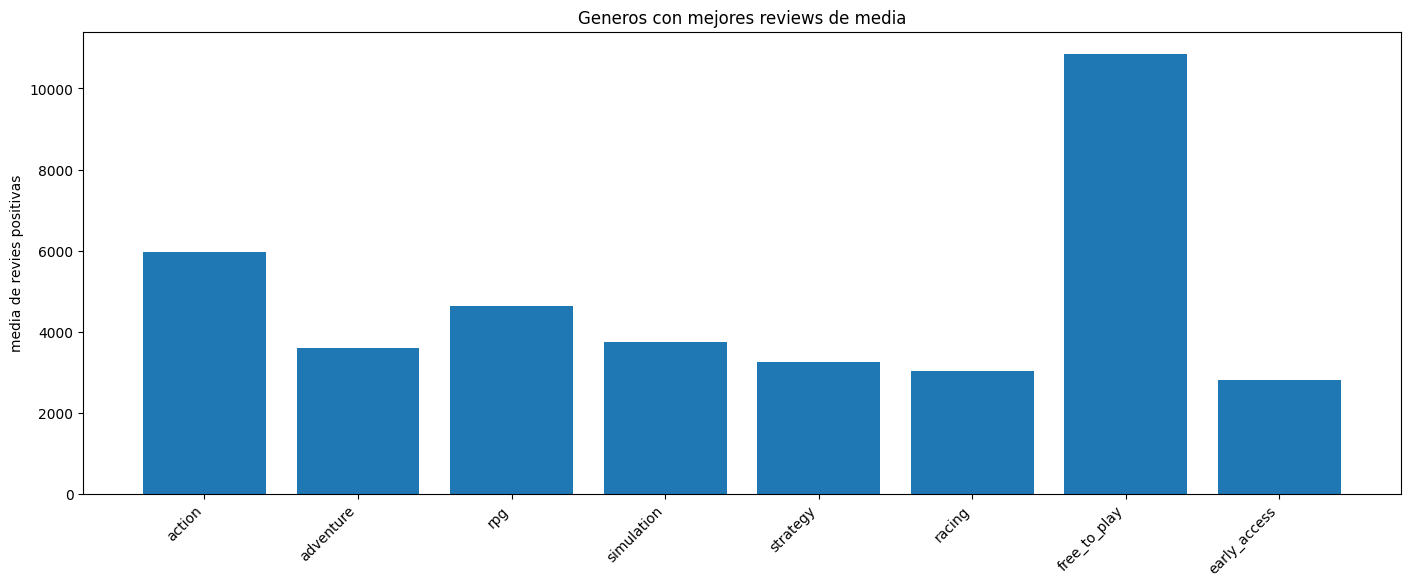

In [121]:
positive_ratings = {"positive_ratings": [genres.loc[genres["action"] == True].mean()["positive_ratings"],
                              genres.loc[genres["adventure"] == True].mean()["positive_ratings"],
                              genres.loc[genres["rpg"] == True].mean()["positive_ratings"],
                              genres.loc[genres["simulation"] == True].mean()["positive_ratings"],
                              genres.loc[genres["strategy"] == True].mean()["positive_ratings"],
                              genres.loc[genres["racing"] == True].mean()["positive_ratings"],
                              genres.loc[genres["free_to_play"] == True].mean()["positive_ratings"],
                              genres.loc[genres["early_access"] == True].mean()["positive_ratings"]],
               "Genres":['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play', 'early_access']
               }
df_positive_ratings = pd.DataFrame(positive_ratings)
df_positive_ratings.set_index("Genres")
bar_plot(df_positive_ratings["Genres"], df_positive_ratings["positive_ratings"],
         "Generos con mejores reviews de media", None, "media de revies positivas")

## Cuánto ha ganado el desarrollador que más juegos ha vendido?

In [164]:
df_developers = df[["developer", "price", "sells"]]
df_developers["total_income"] = df_developers["price"] * df_developers["sells"]
df_developers

<ipython-input-164-2da0aa01c29e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,developer,price,sells,total_income
0,Valve,7.19,15000000,107850000.0
1,Valve,3.99,7500000,29925000.0
2,Valve,3.99,7500000,29925000.0
3,Valve,3.99,7500000,29925000.0
4,Gearbox Software,3.99,7500000,29925000.0
...,...,...,...,...
6165,"Harmonix Music Systems, Inc",15.49,10000,154900.0
6166,KumaKumaManga,4.79,35000,167650.0
6167,东方幕华祭制作组,10.29,10000,102900.0
6168,Dan Fornace,0.00,75000,0.0


In [168]:
df_developers = df_developers.groupby("developer")["total_income"].sum().reset_index()
top_developers = df_developers.sort_values(by='total_income', ascending=False)[['developer', 'total_income']][:5]
top_developers.set_index("developer")

,total_income
developer,
PUBG Corporation,2.024250e+09
Valve,1.207110e+09
"CAPCOM Co., Ltd.",5.745772e+08
Bethesda Game Studios,5.141645e+08
Rockstar North,3.769465e+08


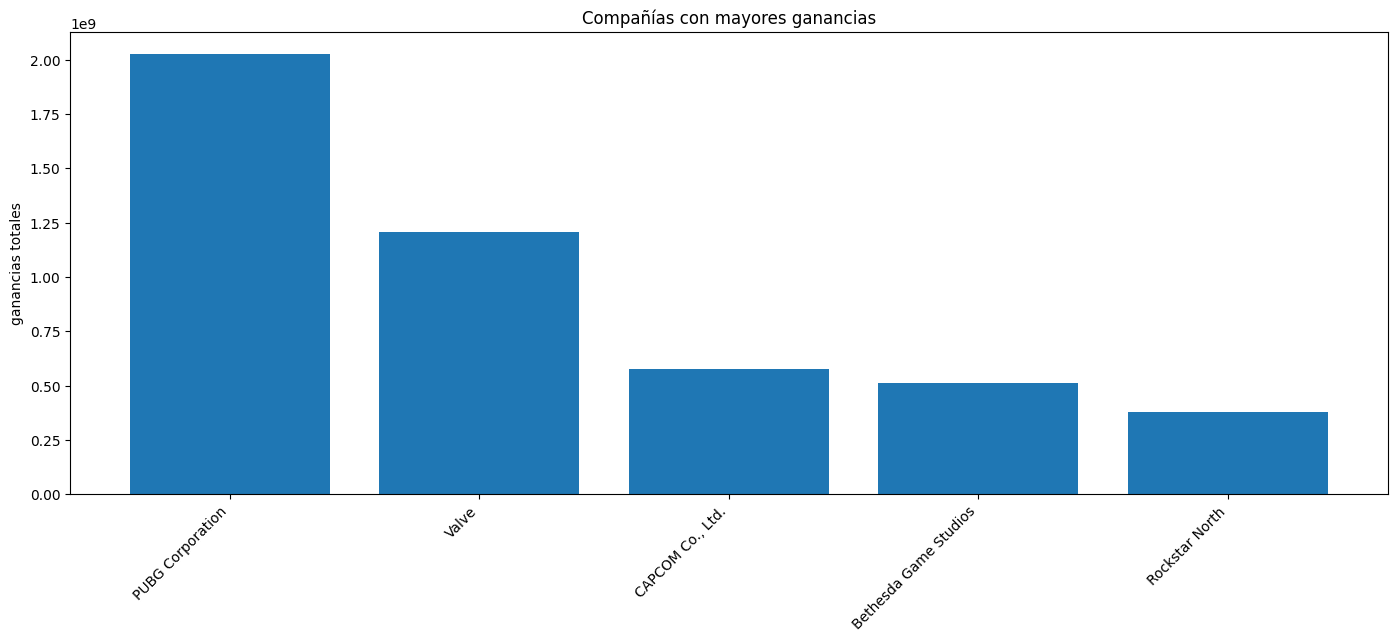

In [169]:
bar_plot(top_developers["developer"], top_developers["total_income"], "Compañías con mayores ganancias", None, "ganancias totales")

## Cómo afecta a las reviews que un juego sea Early Access?

In [205]:
df_early_access = df[['early_access', 'positive_ratings', 'negative_ratings']]
df_early_access.head()

,early_access,positive_ratings,negative_ratings
0,False,124534,3339
1,False,3318,633
2,False,3416,398
3,False,1273,267
4,False,5250,288


In [206]:
ea_review_comparative = {"rating_mean": [df_early_access.loc[df["early_access"] == True].mean()["positive_ratings"],
                                        df_early_access.loc[df["early_access"] == True].mean()["negative_ratings"],
                                        df_early_access.loc[df["early_access"] == False].mean()["positive_ratings"],
                                        df_early_access.loc[df["early_access"] == False].mean()["negative_ratings"]],
                         "type":['ea_positive', 'ea_negative', 'rest_positive', 'rest_negative']
                        }

df_ea_review_comparative = pd.DataFrame(ea_review_comparative)
df_ea_review_comparative.set_index("type")

,rating_mean
type,
ea_positive,2792.839437
ea_negative,843.523944
rest_positive,4266.271023
rest_negative,859.022184


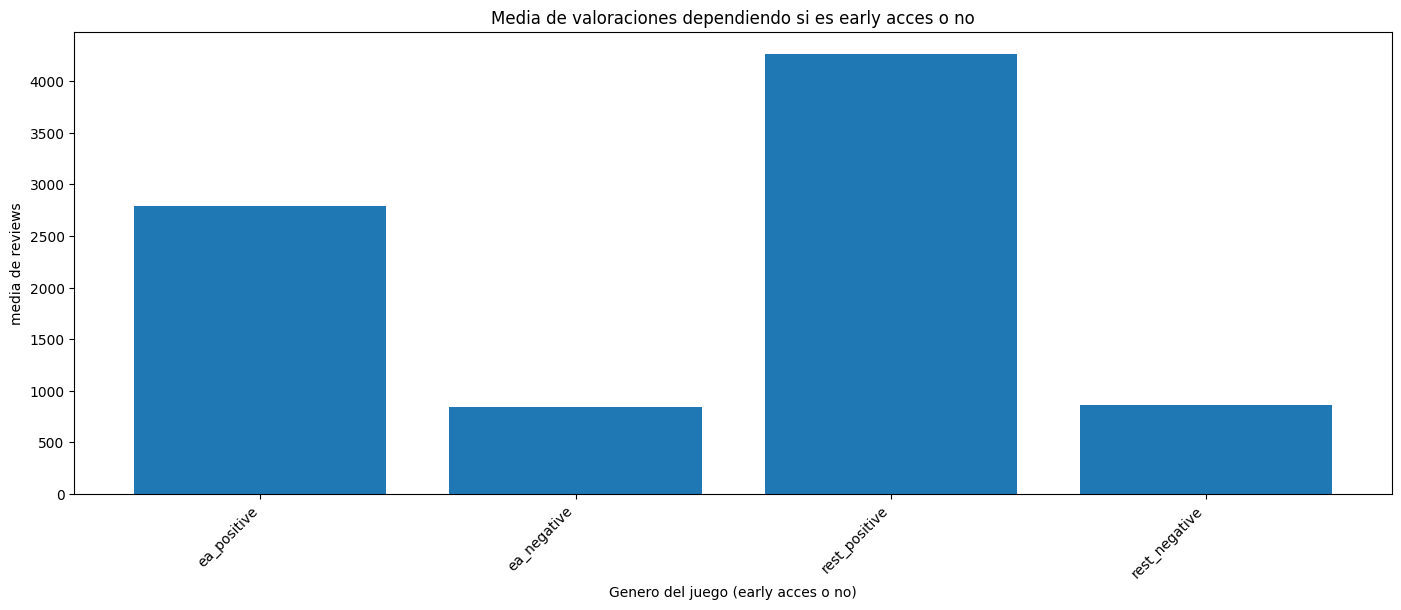

In [208]:
bar_plot(df_ea_review_comparative["type"], df_ea_review_comparative["rating_mean"],
         "Media de valoraciones dependiendo si es early acces o no", "Genero del juego (early acces o no)", "media de reviews")

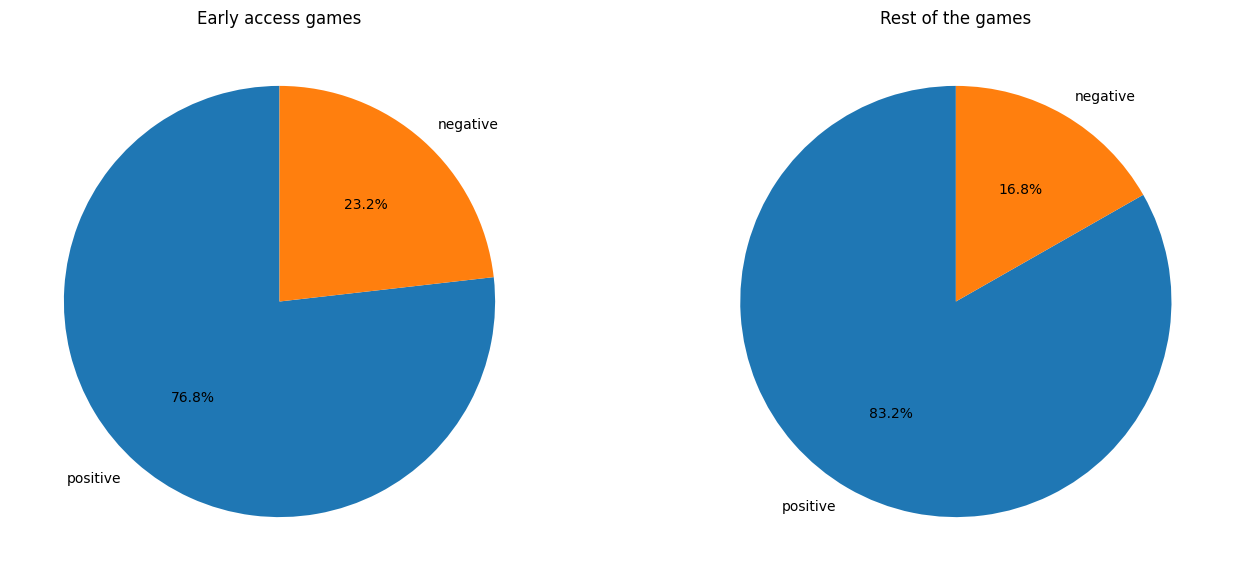

In [246]:
labels = ["positive", "negative"]
datos1 = [df_ea_review_comparative["rating_mean"][0], df_ea_review_comparative["rating_mean"][1]]
datos2 = [df_ea_review_comparative["rating_mean"][2], df_ea_review_comparative["rating_mean"][3]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Crear el primer piechart
sns.color_palette("pastel")
ax1.pie(datos1, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title("Early access games")

# Crear el segundo piechart
sns.color_palette("bright")
ax2.pie(datos2, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Rest of the games')

# Mostrar la visualización
plt.show()

### Otra forma de resolverlo

In [230]:
df_early_access = df[['early_access', 'positive_ratings', 'negative_ratings']]
df_early_access['total_ratings'] = df_early_access[['positive_ratings', 'negative_ratings']].sum(axis=1)
df_early_access['negative_average'] = df_early_access['negative_ratings'] / df_early_access['total_ratings']
df_early_access['positive_average'] = 1 - df_early_access['negative_average']
df_early_access.head()

<ipython-input-230-880c03c92a7c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-230-880c03c92a7c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-230-880c03c92a7c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,early_access,positive_ratings,negative_ratings,total_ratings,negative_average,positive_average
0,False,124534,3339,127873,0.026112,0.973888
1,False,3318,633,3951,0.160213,0.839787
2,False,3416,398,3814,0.104352,0.895648
3,False,1273,267,1540,0.173377,0.826623
4,False,5250,288,5538,0.052004,0.947996


In [231]:
early_access_grouped = df_early_access.groupby("early_access")["negative_average"].mean().reset_index()
early_access_grouped['positive_average'] = 1 - early_access_grouped['negative_average']
early_access_grouped.head()

,early_access,negative_average,positive_average
0,False,0.259591,0.740409
1,True,0.297148,0.702852


In [232]:
labels = ["positive", "negative"]
values = [early_access_grouped['positive_average'][0], early_access_grouped['negative_average'][0]]
values2 = [early_access_grouped['positive_average'][1], early_access_grouped['negative_average'][1]]

In [234]:
# Generamos dos figuras usando la librería de plotly
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"},]])

fig.add_trace(go.Pie(labels=labels, values=values,
              title='non early access'), row=1, col=1)
fig.add_trace(go.Pie(labels=labels, values=values2,
              title='early access'), row=1, col=2)


fig.show()

## Cuál es el desarrollador (o desarrolladores) que más tipos de juego y cantidad ha desarrollado?

In [282]:
df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19,15000000,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99,7500000,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99,7500000,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99,7500000,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99,7500000,True,False,False,False,False,False,False,False


In [305]:
df_devs = df[["developer", "name"]]
df_devs = df_devs["developer"].value_counts().to_frame()[:10]
df_devs.reset_index(inplace = True)
df_devs.rename(columns={"index":"developer", "developer":"games_number"}, inplace = True)
df_devs

,developer,games_number
0,Valve,26
1,EnsenaSoft,26
2,Daedalic Entertainment,17
3,Winged Cloud,17
4,Square Enix,17
5,"KOEI TECMO GAMES CO., LTD.",16
6,id Software,16
7,Just1337 Studio,15
8,LucasArts,14
9,Ubisoft Montreal,14


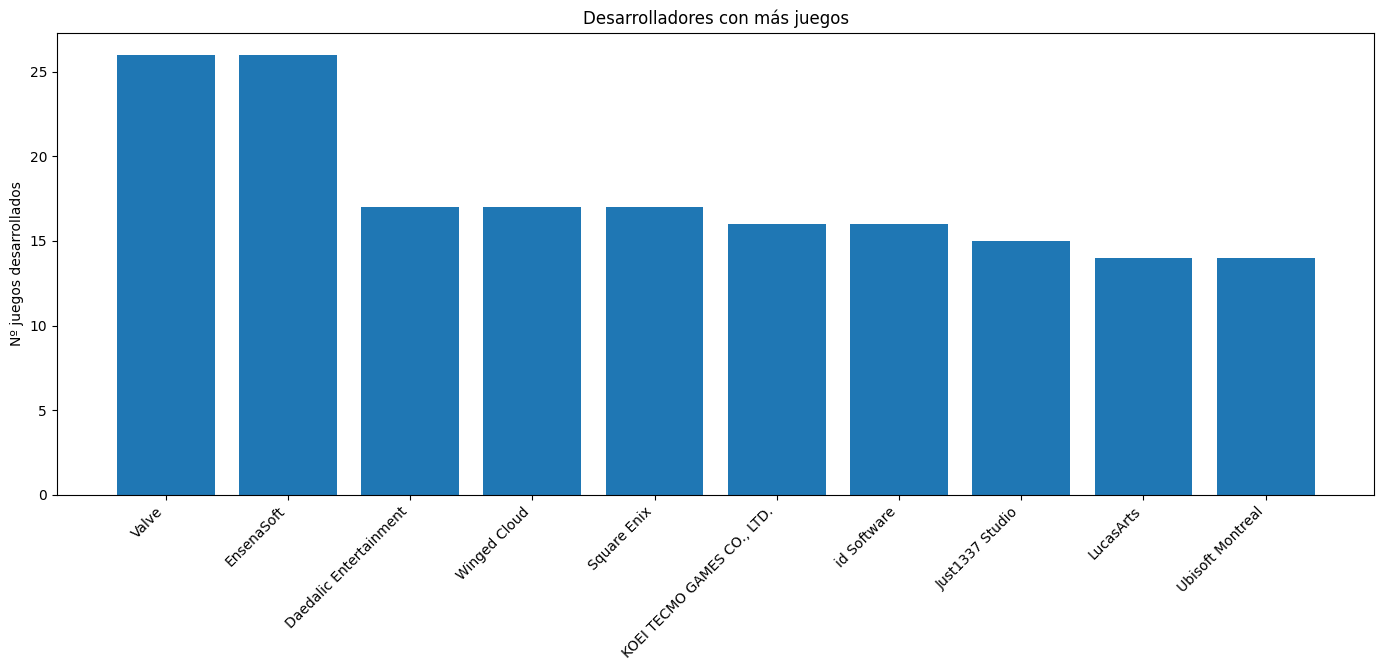

In [307]:
bar_plot(df_devs["developer"], df_devs["games_number"], "Desarrolladores con más juegos", None, "Nº juegos desarrollados")

### Otra forma de resolverlo incorporando los géneros

In [383]:
genre_list = ['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing', "free_to_play", "early_access"]
df_genre = df[genre_list]
df_genre["final_genre"] = df_genre.apply(lambda x: ", ".join(x.index[x]), axis=1)
df_genre.sample(5)

<ipython-input-383-e78353fb0dbd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access,final_genre
3942,False,True,False,True,False,False,False,False,"adventure, simulation"
966,False,False,True,False,False,False,True,False,"rpg, free_to_play"
5910,True,True,False,False,False,False,True,False,"action, adventure, free_to_play"
5859,False,False,False,True,False,False,True,False,"simulation, free_to_play"
3520,True,False,False,False,False,False,False,False,action


In [384]:
df_devs = df[["developer", "name"]]
df_devs["genre"] = df_genre["final_genre"]
df_devs.sample(5)

<ipython-input-384-152787dbff4e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,developer,name,genre
2392,Eidos Montreal;Feral Interactive (Linux);Feral...,Deus Ex: Mankind Divided,"action, rpg"
1698,Lince Works,Aragami,"action, adventure"
2556,高考恋爱委员会,Gaokao.Love.100Days,"adventure, simulation"
1820,Apeiron,"7,62 High Calibre","rpg, simulation, strategy"
978,Team Psykskallar,Cry of Fear,"action, adventure"


In [385]:
df_devs_name_counts = df_devs.groupby('developer')['name'].count().sort_values(ascending=False)[:5].reset_index()
df_devs_name_counts.rename(columns={"name":"games_number"}, inplace = True)
df_devs_name_counts.head()

,developer,games_number
0,Valve,26
1,EnsenaSoft,26
2,Daedalic Entertainment,17
3,Square Enix,17
4,Winged Cloud,17


In [386]:
# De un mismo developer, nos quedamos con los tipos de generos que han desarrollado, pero solo lo contamos una vez cada tipo de genero.
df_devs.drop_duplicates(subset=['developer', 'genre'], keep='first', inplace=True)

<ipython-input-386-c825fd704745>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [387]:
df_devs_genre_counts = df_devs.groupby('developer')['genre'].count().sort_values(ascending=False)[:5].reset_index()
df_devs_genre_counts.rename(columns={"genre":"dif_type_games"}, inplace = True)
df_devs_genre_counts.head()

,developer,dif_type_games
0,Bohemia Interactive,8
1,Valve,7
2,DL Softworks,7
3,Double Fine Productions,7
4,Cyanide Studio,7


In [388]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=False,
                    specs=[[{"type": "bar"}, {"type": "bar"},]],
                    subplot_titles=("diversidad de generos", "cantidad de juegos"))

fig.add_trace(go.Bar(
    x=df_devs_genre_counts['developer'], y=df_devs_genre_counts['dif_type_games']), row=1, col=1)
fig.add_trace(go.Bar(
    x=df_devs_name_counts['developer'], y=df_devs_name_counts['games_number']), row=1, col=2)


fig.show()

<ipython-input-402-1e6da16d6cdf>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-402-1e6da16d6cdf>:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



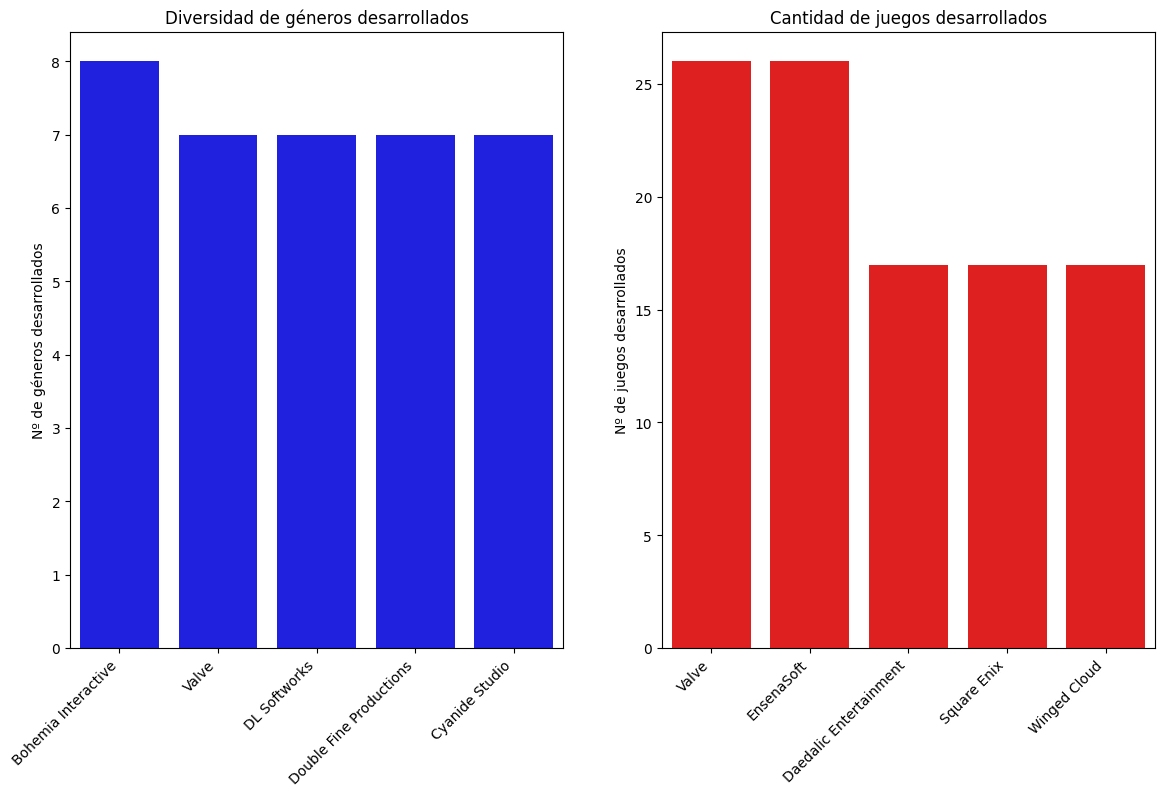

In [402]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), sharey=False, sharex=False)

sns.color_palette("pastel")

sns.barplot(ax=ax1, x=df_devs_genre_counts['developer'], y=df_devs_genre_counts['dif_type_games'], color = "blue")
ax1.set_title('Diversidad de géneros desarrollados')
ax1.set_ylabel("Nº de géneros desarrollados")
ax1.set_xticklabels(ax1.get_xticklabels(),
                          rotation=45,
                          horizontalalignment='right')
ax1.set(xlabel=None)

sns.barplot(ax=ax2, x=df_devs_name_counts['developer'], y=df_devs_name_counts['games_number'], color = "red")
ax2.set_title('Cantidad de juegos desarrollados')
ax2.set_ylabel("Nº de juegos desarrollados")
ax2.set_xticklabels(ax2.get_xticklabels(),
                          rotation=45,
                          horizontalalignment='right')
ax2.set(xlabel=None)
plt.show()

## En qué mes, desde que tenemos datos, se han publicado más juegos?

In [419]:
df_release = df[["name", "release_date"]]
df_release

,name,release_date
0,Counter-Strike,2000-11-01
1,Team Fortress Classic,1999-04-01
2,Day of Defeat,2003-05-01
3,Deathmatch Classic,2001-06-01
4,Half-Life: Opposing Force,1999-11-01
...,...,...
6165,Audica,2019-03-07
6166,KumaKuma Manga Editor,2019-02-27
6167,東方幕華祭 春雪篇 ～ Fantastic Danmaku Festival Part II,2019-03-18
6168,Lovers of Aether,2019-04-01


In [471]:
df_month = df_release.groupby(df_release['release_date'].dt.month).count()
df_month.drop("release_date", axis=1, inplace = True)
df_month.reset_index(inplace=True)
df_month.rename(columns={"release_date":"release_month", "name":"game_count"}, inplace=True)
df_month


,release_month,game_count
0,1,431
1,2,492
2,3,556
3,4,535
4,5,551
5,6,439
6,7,485
7,8,565
8,9,552
9,10,586


<function matplotlib.pyplot.show(close=None, block=None)>

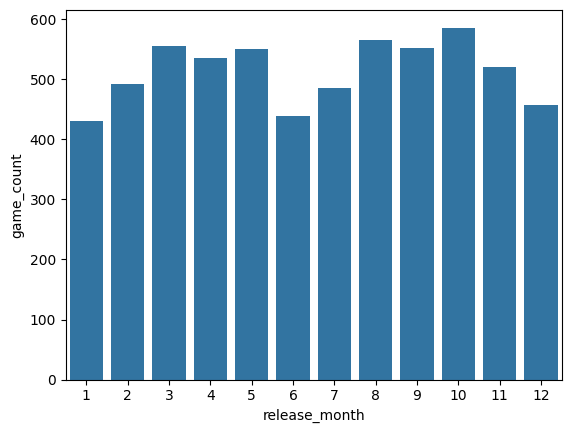

In [472]:
g = sns.barplot(x=df_month["release_month"],
                y=df_month["game_count"])

plt.show

## Cuántas horas se juega de media a cada tipo de juego mensualmente?

In [634]:
df_avg_hours = df[['release_date', 'avg_hours_per_user']]

In [635]:
df_avg_hours["genre"] = df_genre["final_genre"]

<ipython-input-635-20df4ff3dc97>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [636]:
df_avg_hours = df_avg_hours.sort_values(by='release_date', ascending=False).reset_index()
df_avg_hours.head()

,index,release_date,avg_hours_per_user,genre
0,6169,2019-04-19,347,"action, adventure"
1,3839,2019-04-18,211,action
2,5843,2019-04-18,587,"action, adventure, simulation"
3,6161,2019-04-12,9,"rpg, simulation"
4,4707,2019-04-11,242,"adventure, rpg, strategy"


In [637]:
df_avg_hours.drop( "index", axis= 1, inplace=True)

In [638]:
df_avg_hours.head()

,release_date,avg_hours_per_user,genre
0,2019-04-19,347,"action, adventure"
1,2019-04-18,211,action
2,2019-04-18,587,"action, adventure, simulation"
3,2019-04-12,9,"rpg, simulation"
4,2019-04-11,242,"adventure, rpg, strategy"


In [639]:
df_avg_hour_genre = df_avg_hours.groupby([df['release_date'].dt.month, 'genre'])['avg_hours_per_user'].mean()

In [640]:
df_avg_hour_genre = df_avg_hour_genre.to_frame()

In [642]:
df_avg_hour_genre = df_avg_hour_genre.reset_index()

fig = plt.figure(figsize=(16, 7))

g = sns.scatterplot(data=df_avg_hour_genre,
                    x = df_avg_hour_genre["release_date"],
                    y = df_avg_hour_genre["avg_hours_per_user"],
                    hue = df_avg_hour_genre["genre"],
                    alpha = 0.1)

plt.show()

### Otra forma de hacerlo podría ser:

In [683]:
genres = df[['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play', 'early_access', "avg_hours_per_user"]]
genres["release_month"] = df["release_date"].dt.month

<ipython-input-683-9be84514b99a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [684]:
genres.head()

,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access,avg_hours_per_user,release_month
0,True,False,False,False,False,False,False,False,17612,11
1,True,False,False,False,False,False,False,False,277,4
2,True,False,False,False,False,False,False,False,187,5
3,True,False,False,False,False,False,False,False,258,6
4,True,False,False,False,False,False,False,False,624,11


In [685]:
df_avg_hours = genres.groupby(['release_month', 'action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play', 'early_access']).mean()

In [693]:
df_avg_hours.sample(5)

avg_hours_per_user
release_month action adventure rpg   simulation strategy racing free_to_play early_access                    
12            False  True      False False      False    False  True         True                   24.000000
7             False  False     False True       False    False  True         False                 109.333333
1             True   False     False True       True     False  True         False                   6.000000
11            True   True      True  False      False    False  False        False                 432.166667
              False  False     False True       False    True   False        False                 505.000000

avg_hours = {"avg_hours": [df_avg_hours.loc[df_avg_hours["action"] == True].mean()["avg_hours_per_user"],
                          df_avg_hours.loc[df_avg_hours["adventure"] == True].mean()["avg_hours_per_user"],
                          df_avg_hours.loc[df_avg_hours["rpg"] == True].mean()["avg_hours_per_user"],
                          df_avg_hours.loc[df_avg_hours["simulation"] == True].mean()["avg_hours_per_user"],
                          df_avg_hours.loc[df_avg_hours["strategy"] == True].mean()["avg_hours_per_user"],
                          df_avg_hours.loc[df_avg_hours["racing"] == True].mean()["avg_hours_per_user"],
                          df_avg_hours.loc[df_avg_hours["free_to_play"] == True].mean()["avg_hours_per_user"],
                          df_avg_hours.loc[df_avg_hours["early_access"] == True].mean()["avg_hours_per_user"]],
               "Genres":['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play', 'early_access']
               }

df_avg_hours = pd.DataFrame(avg_hours)

## Los juegos Free to Play tienen mejores o peores reviews?

In [694]:
free_to_play_df = df[['free_to_play','positive_ratings', 'negative_ratings']].copy()

In [695]:
free_to_play_df['total_ratings'] = free_to_play_df[['positive_ratings', 'negative_ratings']].sum(axis=1)
free_to_play_df['negative_average'] = free_to_play_df['negative_ratings'] / free_to_play_df['total_ratings']

In [696]:
free_to_play_grouped = free_to_play_df.groupby("free_to_play")["negative_average"].mean().reset_index()

In [698]:
free_to_play_grouped['positive_average'] = 1 - free_to_play_grouped['negative_average']

In [699]:
free_to_play_grouped

,free_to_play,negative_average,positive_average
0,False,0.258236,0.741764
1,True,0.290520,0.709480


In [700]:
labels = ['positive', 'negative']
values = [0.715487, 0.284513]
values2 = [0.699454, 0.300546]

fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"},]])

fig.add_trace(go.Pie(labels=labels, values=values,
              title='non free to play'), row=1, col=1)
fig.add_trace(go.Pie(labels=labels, values=values2,
              title='free to play'), row=1, col=2)

## Cómo ha evolucionado el número de achievements (trofeos) por año?

In [701]:
ach_df = df[['release_date', 'name', 'achievements']].copy()

In [702]:
ach_df.drop(ach_df.loc[ach_df['achievements'] == 0].index, inplace=True)

In [703]:
ach_grouped = ach_df.groupby(pd.Grouper(key='release_date', freq='M'))['achievements'].mean().reset_index()

In [704]:
ach_grouped.dropna(inplace=True)

In [705]:
ach_grouped = ach_grouped.sort_values(by='release_date', ascending=True)[['release_date', 'achievements']].reset_index()

In [706]:
ach_grouped = ach_grouped[['release_date', 'achievements']]

In [707]:
fig = go.Figure(go.Scatter(
    x=ach_grouped['release_date'], y=ach_grouped['achievements']))
fig.show()

## Bonus! Si tienes curiosidad, y quieres contestar más preguntas, puedes resolverlas aquí mismo!